In [22]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#Importing functions from UTILS.PY file
from utils import ALL_LETTERS, N_LETTERS
from utils import load_data, letter_to_tensor, line_to_tensor, random_training_example

In [23]:
# Defining Network for Name Classification

class NameClassification(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NameClassification, self).__init__()

        # Tuneable parameter 
        self.hidden_size = hidden_size
        
        # Network layers 
        self.input_to_hidden = nn.Linear(input_size + hidden_size, hidden_size)
        self.input_to_output = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_tensor, hidden_state_tensor):
        # Concatenating input and hidden state 
        combined = torch.cat((input_tensor, hidden_state_tensor), 1)

        hidden_state = self.input_to_hidden(combined)
        output = self.input_to_output(combined)
        output = self.softmax(output)
        
        #returning output and hidden state
        return output, hidden_state
    
    # Intial hidden state
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)



In [24]:
#loading data
category_lines, all_categories = load_data()
n_categories = len(all_categories)
#Parameters setting

hidden_size = 256
name_classifer = NameClassification(N_LETTERS, hidden_size, n_categories)
# Loss function "negative log likelihood"
criterion = nn.NLLLoss()
#learning rate
learning_rate = 0.003
# optimizer "stochastic gradient descent"
optimizer = torch.optim.SGD(name_classifer.parameters(), lr=learning_rate)

In [25]:
# Training Function

def training(line_tensor, category_tensor):
    hidden_state = name_classifer.init_hidden()
    # Training character by character

    for i in range(line_tensor.size()[0]):
        # getting output and hidden state 
        output, hidden_state = name_classifer(line_tensor[i], hidden_state)
    # loss calculation 
    loss = criterion(output, category_tensor)
    
    # optimizing loss with Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss.item()

In [26]:
# Training Loop


# intializing the loss and step veriables 
current_loss = 0
all_losses = []
plot_steps, print_steps = 1000, 5000

# number of iteration 
n_iters = 100000

# loop for each iteration
for i in range(n_iters):

    # getting random example from the dataset --- utils.py has this function
    category, line, category_tensor, line_tensor = random_training_example(category_lines, all_categories)
    
    # passing through train function to get loss
    loss = training(line_tensor, category_tensor)
    current_loss += loss 
    
    if (i+1) % plot_steps == 0:
        all_losses.append(current_loss / plot_steps)
        current_loss = 0
        
    if (i+1) % print_steps == 0:
        #loss after every print_step (after every 5000 iterations)
        print(f"{i+1} {(i+1)/n_iters*100} {loss:.4f}")
        

5000 5.0 2.7140
10000 10.0 2.3086
15000 15.0 2.0796
20000 20.0 3.1264
25000 25.0 1.1196
30000 30.0 2.8812
35000 35.0 2.0712
40000 40.0 2.7369
45000 45.0 1.9151
50000 50.0 1.6931
55000 55.00000000000001 2.9571
60000 60.0 1.3347
65000 65.0 2.1561
70000 70.0 0.6262
75000 75.0 0.7339
80000 80.0 1.7883
85000 85.0 2.0650
90000 90.0 0.6201
95000 95.0 1.0401
100000 100.0 0.0457


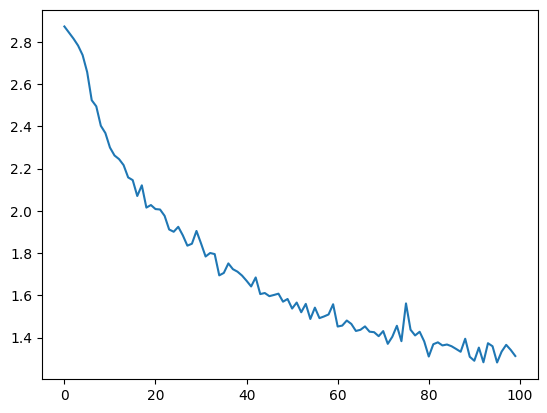

In [27]:
#ploting the loss 
plt.figure()
plt.plot(all_losses)
plt.show()